<a href="https://colab.research.google.com/github/sebastianlilly/primer-c-digo/blob/main/Spotify_Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalación del módulo Spotify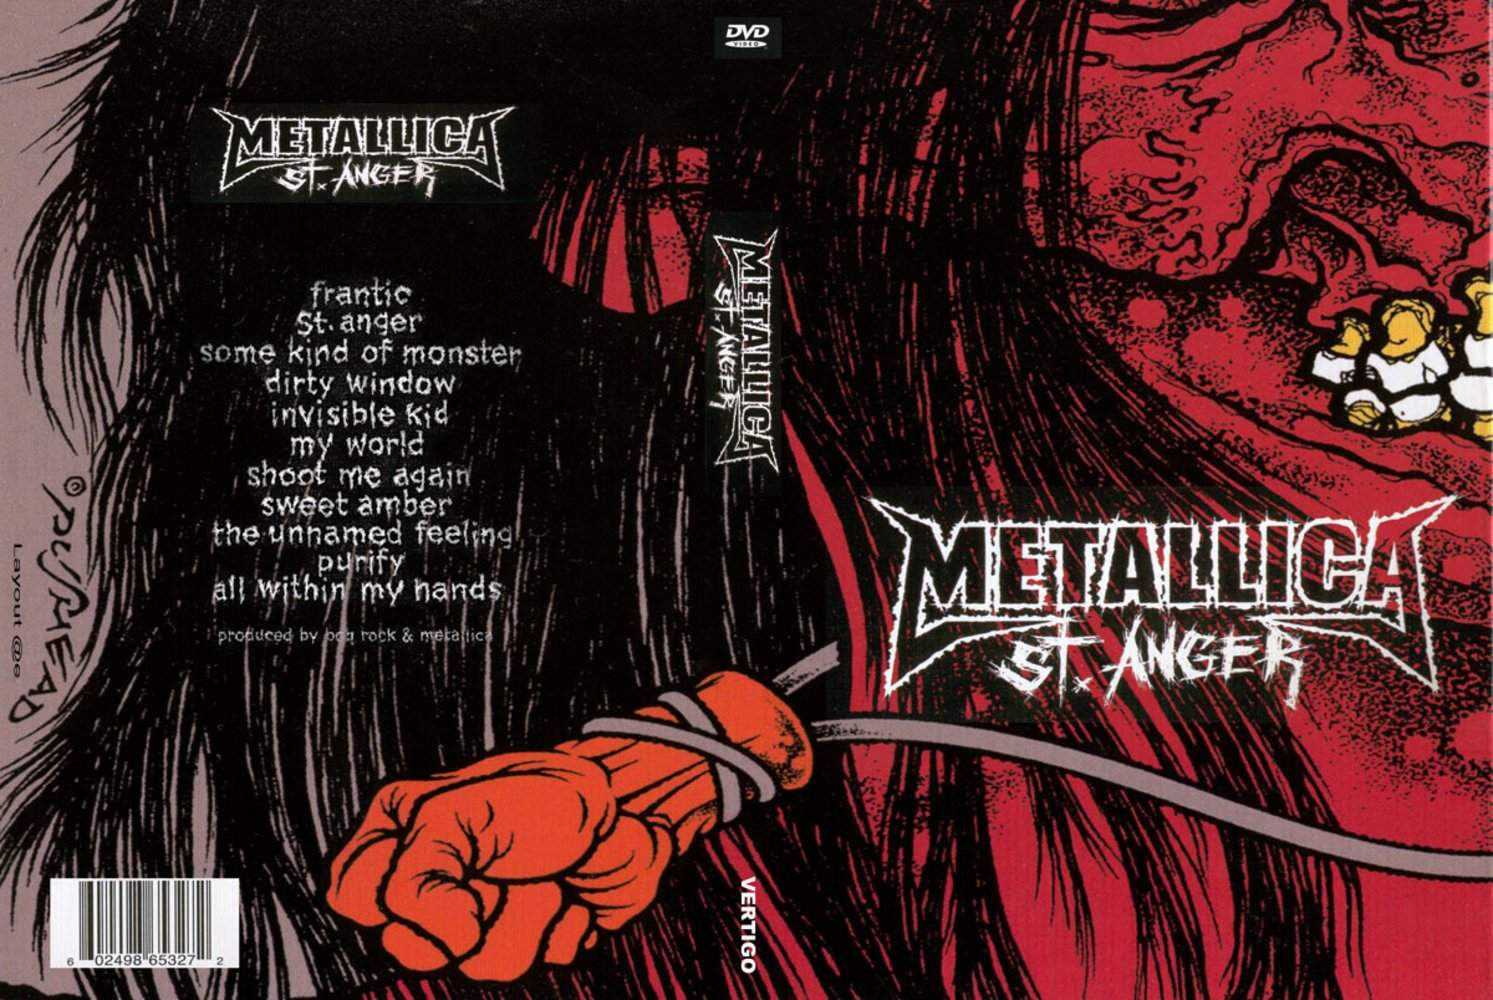

In [2]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 6.6 MB/s eta 0:00:00


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "0054a24f2fc643c69d56d020dd5f70be"
client_secret = "98b4a4b772ad4eca934a92ca60c246a0"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Este código está utilizando la biblioteca `spotipy` de Python para autenticarse con las credenciales de cliente de la API de Spotify y crear un objeto `Spotify` que permitirá interactuar con los servicios web de Spotify.

Aquí está un desglose de lo que hace cada línea:

1. `import spotipy`: Importa el módulo `spotipy`, que es una biblioteca de Python para interactuar con la API de Spotify.

2. `from spotipy.oauth2 import SpotifyClientCredentials`: Importa la clase `SpotifyClientCredentials` desde el submódulo `oauth2` de `spotipy`. Esta clase se utiliza para autenticarse con las credenciales de cliente en la API de Spotify.

3. `client_id = "0054a24f2fc643c69d56d020dd5f70be"`: Asigna el ID de cliente (client ID) proporcionado por Spotify al desarrollar una aplicación que utiliza su API.

4. `client_secret = "98b4a4b772ad4eca934a92ca60c246a0"`: Asigna el secreto de cliente (client secret) proporcionado por Spotify al desarrollar una aplicación que utiliza su API.

5. `client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)`: Crea un objeto `SpotifyClientCredentials` utilizando el ID de cliente y el secreto de cliente. Este objeto se encargará de autenticarse con la API de Spotify utilizando el flujo de autenticación de credenciales de cliente.

6. `sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)`: Crea un objeto `Spotify` de la biblioteca `spotipy`, pasando el objeto `client_credentials_manager` creado anteriormente. Este objeto `Spotify` es el que se utilizará para realizar solicitudes a la API de Spotify.



Búsqueda de un artista en particular dentro de Spotify

In [4]:
name = ["Metallica"]
result = sp.search(name)
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2ye2Wgw4gimLv2eAKyk1NB'},
  'href': 'https://api.spotify.com/v1/artists/2ye2Wgw4gimLv2eAKyk1NB',
  'id': '2ye2Wgw4gimLv2eAKyk1NB',
  'name': 'Metallica',
  'type': 'artist',
  'uri': 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'}]

Extraer álbumes de Spotify:
 Almacenaremos los URI de Spotify y los nombres de los álbumes en listas separadas como referencia que podremos usar más adelante durante el análisis de datos.

In [5]:
#Extracción del URI dek artista
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
#Extrae todos los albunes de los artistas
artist_albums = sp.artist_albums(artists_uris, album_type='album')
#Tienda del artist's albums' names' y URIs separadas por listas
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

artist_album_names
artist_album_uris
#Se debe mantener los nombres y los uris en el mismo orden para realizar un seguimiento de los álbumes duplicados

['spotify:album:6UwjRSX9RQyNgJ3LwYhr9i',
 'spotify:album:7h5xn0Olvx2p0eQcSt1Osy',
 'spotify:album:3dck2tBxGfxj9m3CguDgjb',
 'spotify:album:7Hc3m7konwS0ugyN8vJhNg',
 'spotify:album:5tEW32iyrRuYPQQ4bwUiCf',
 'spotify:album:4bcUiX49wpmDRhrC8TvDWV',
 'spotify:album:7LwifLL1anaEd9eIIfIkx7',
 'spotify:album:0ecPxTAKqXdr2MJYdYOM7e',
 'spotify:album:3a1SJd8obHju43McHQew7J',
 'spotify:album:3bK58rVcWBh3V3vxMLzi0V',
 'spotify:album:4t0oscNTGJkXiIB2uqZYWg',
 'spotify:album:0HKpzK9ZoJ0oVA43E5gewM',
 'spotify:album:1OZaosC2RtsE2TEqLziwAD',
 'spotify:album:0vshXZYhBkbIoqxyC2fXcF',
 'spotify:album:0Ip2GlQPoAIgdkqCO2YkMa',
 'spotify:album:6ndH0UlQbyCOVqByMXXhdV',
 'spotify:album:6TXWP5SAhTB9P0GN4tOT0B',
 'spotify:album:6jZ1z25PyF4Yd3kHxt9rl1',
 'spotify:album:2bKDte0I4SceROjBMtYtKV',
 'spotify:album:2Lq2qX3hYhiuPckC8Flj21']

Extrae todas las canciones de cada álbum. Lo siguiente sería recorrer cada álbum para extraer datos clave de las pistas del álbum.

In [6]:
def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Crear claves-valores de listas vacías dentro del diccionario anidado para el álbum
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #Descarga la data de los albumes
    tracks = sp.album_tracks(album)
    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

Ahora podemos aplicar la función a cada URI de álbum en la lista para extraer los datos de la pista y crear un diccionario vacío llamado para almacenar los datos del álbum de Spotify.

In [7]:
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #cada album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Realiza un aumento o update de los albumes, conforme los datos son descargados y añadidos

72 Seasons album songs has been added to spotify_albums dictionary
Metallica (Remastered Deluxe Box Set) album songs has been added to spotify_albums dictionary
Metallica (Remastered 2021) album songs has been added to spotify_albums dictionary
S&M2 album songs has been added to spotify_albums dictionary
Helping Hands…Live & Acoustic At The Masonic album songs has been added to spotify_albums dictionary
Hardwired…To Self-Destruct (Deluxe) album songs has been added to spotify_albums dictionary
Hardwired…To Self-Destruct album songs has been added to spotify_albums dictionary
Metallica Through The Never (Music From The Motion Picture) album songs has been added to spotify_albums dictionary
Lulu album songs has been added to spotify_albums dictionary
Death Magnetic album songs has been added to spotify_albums dictionary
Some Kind Of Monster album songs has been added to spotify_albums dictionary
St. Anger album songs has been added to spotify_albums dictionary
S&M album songs has been ad

Extraer funciones de audio para cada canción¶ Para almacenar las características de audio de cada pista del álbum y agregar los datos en listas que representan todas las pistas de música de ese álbum, agregamos valores-clave adicionales.

In [8]:
def audio_features(album):
    #Agregar nuevos valores-clave para almacenar funciones de audio
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    for track in spotify_albums[album]['uri']:
        #Agrega los elementos de audio conforme se van descargando los datos de la canción
        features = sp.audio_features(track)

        #Agregar al valor-clave relevante
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #la popularidad se almacena en otra parte
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

Ahora podemos recorrer los álbumes extrayendo las funciones de audio. Para esto, agregaremos un retraso aleatorio cada pocos álbumes para evitar enviar demasiadas solicitudes a la API de Spotify.

In [9]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 19.19097590446472 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 34.10714912414551 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 48.7033166885376 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 64.94732999801636 seconds


Ahora es el momento de agregar los datos de música de Spotify anteriores a un nuevo marco de datos, pero antes de hacerlo, primero debemos organizar nuestros datos en un diccionario que se pueda convertir en un marco de datos.

In [10]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

len(dic_df['album'])

367

Ahora comenzamos a ver cosas

In [11]:
import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,72 Seasons,1,3uSATa7xWXVJrMhJJSnGGk,72 Seasons,spotify:track:3uSATa7xWXVJrMhJJSnGGk,0.000040,0.193,0.983,0.0375,0.0645,-3.929,0.0591,168.193,0.385,57
1,72 Seasons,2,5iG1GycXpheJ5xMW0gNvKv,Shadows Follow,spotify:track:5iG1GycXpheJ5xMW0gNvKv,0.000121,0.313,0.979,0.0313,0.2610,-3.907,0.0462,178.884,0.678,55
2,72 Seasons,3,2hBn08QphNtdnhwDNtnZMg,Screaming Suicide,spotify:track:2hBn08QphNtdnhwDNtnZMg,0.000024,0.425,0.972,0.0202,0.2390,-3.448,0.0450,101.125,0.282,57
3,72 Seasons,4,6HeYgpgqEo8SGis4dHwRbu,Sleepwalk My Life Away,spotify:track:6HeYgpgqEo8SGis4dHwRbu,0.000017,0.430,0.950,0.0641,0.1030,-4.203,0.0340,124.931,0.543,51
4,72 Seasons,5,1ALXFmNr7lrTug2LAE989q,You Must Burn!,spotify:track:1ALXFmNr7lrTug2LAE989q,0.000122,0.397,0.958,0.0203,0.0378,-3.088,0.0341,85.836,0.416,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Master Of Puppets (Remastered),4,4TktvZTsMoFukiim1otMtr,Welcome Home (Sanitarium),spotify:track:4TktvZTsMoFukiim1otMtr,0.000324,0.306,0.766,0.1010,0.1020,-9.693,0.0329,96.668,0.420,54
363,Master Of Puppets (Remastered),5,4tPHBRIPsB55nssjvKDbjj,Disposable Heroes,spotify:track:4tPHBRIPsB55nssjvKDbjj,0.000043,0.292,0.931,0.4680,0.0901,-7.618,0.0919,90.610,0.427,54
364,Master Of Puppets (Remastered),6,6XN00D9ejjEt1cW1sY44Gu,Leper Messiah,spotify:track:6XN00D9ejjEt1cW1sY44Gu,0.000052,0.379,0.808,0.7940,0.3220,-8.605,0.0684,138.694,0.557,53
365,Master Of Puppets (Remastered),7,2HD5BWFthrNf2uFyEhi53d,Orion,spotify:track:2HD5BWFthrNf2uFyEhi53d,0.001420,0.365,0.670,0.8920,0.1110,-10.014,0.0386,128.488,0.400,54


Spotify tiene un problema de duplicación que se puede solucionar eliminando todas las canciones excepto las más populares.

In [12]:
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))
final_df.head()

367
321


,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,72 Seasons,1,3uSATa7xWXVJrMhJJSnGGk,72 Seasons,spotify:track:3uSATa7xWXVJrMhJJSnGGk,0.000040,0.193,0.983,0.0375,0.0645,-3.929,0.0591,168.193,0.385,57
1,72 Seasons,2,5iG1GycXpheJ5xMW0gNvKv,Shadows Follow,spotify:track:5iG1GycXpheJ5xMW0gNvKv,0.000121,0.313,0.979,0.0313,0.2610,-3.907,0.0462,178.884,0.678,55
2,72 Seasons,3,2hBn08QphNtdnhwDNtnZMg,Screaming Suicide,spotify:track:2hBn08QphNtdnhwDNtnZMg,0.000024,0.425,0.972,0.0202,0.2390,-3.448,0.0450,101.125,0.282,57
3,72 Seasons,4,6HeYgpgqEo8SGis4dHwRbu,Sleepwalk My Life Away,spotify:track:6HeYgpgqEo8SGis4dHwRbu,0.000017,0.430,0.950,0.0641,0.1030,-4.203,0.0340,124.931,0.543,51
4,72 Seasons,5,1ALXFmNr7lrTug2LAE989q,You Must Burn!,spotify:track:1ALXFmNr7lrTug2LAE989q,0.000122,0.397,0.958,0.0203,0.0378,-3.088,0.0341,85.836,0.416,51


Finalmente, guardemos este marco de datos en un archivo CSV.

In [13]:
final_df.to_csv("spotify_music.csv") #este comando crea la base de datos, que se va a cargar en colab y que luego se puede descargar en csv

In [14]:
df=final_df
df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,72 Seasons,1,3uSATa7xWXVJrMhJJSnGGk,72 Seasons,spotify:track:3uSATa7xWXVJrMhJJSnGGk,0.000040,0.193,0.983,0.0375,0.0645,-3.929,0.0591,168.193,0.385,57
1,72 Seasons,2,5iG1GycXpheJ5xMW0gNvKv,Shadows Follow,spotify:track:5iG1GycXpheJ5xMW0gNvKv,0.000121,0.313,0.979,0.0313,0.2610,-3.907,0.0462,178.884,0.678,55
2,72 Seasons,3,2hBn08QphNtdnhwDNtnZMg,Screaming Suicide,spotify:track:2hBn08QphNtdnhwDNtnZMg,0.000024,0.425,0.972,0.0202,0.2390,-3.448,0.0450,101.125,0.282,57
3,72 Seasons,4,6HeYgpgqEo8SGis4dHwRbu,Sleepwalk My Life Away,spotify:track:6HeYgpgqEo8SGis4dHwRbu,0.000017,0.430,0.950,0.0641,0.1030,-4.203,0.0340,124.931,0.543,51
4,72 Seasons,5,1ALXFmNr7lrTug2LAE989q,You Must Burn!,spotify:track:1ALXFmNr7lrTug2LAE989q,0.000122,0.397,0.958,0.0203,0.0378,-3.088,0.0341,85.836,0.416,51


In [15]:
df.columns

Index(['album', 'track_number', 'id', 'name', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity'],
      dtype='object')

In [17]:
df.info()
#con esto vemos los datos categóricos y los numéricos
# la idea es ver el tipo de columnas y sus clase de datos. Esto es útil para el trabajo que biena mas abajo


<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 366
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             321 non-null    object 
 1   track_number      321 non-null    int64  
 2   id                321 non-null    object 
 3   name              321 non-null    object 
 4   uri               321 non-null    object 
 5   acousticness      321 non-null    float64
 6   danceability      321 non-null    float64
 7   energy            321 non-null    float64
 8   instrumentalness  321 non-null    float64
 9   liveness          321 non-null    float64
 10  loudness          321 non-null    float64
 11  speechiness       321 non-null    float64
 12  tempo             321 non-null    float64
 13  valence           321 non-null    float64
 14  popularity        321 non-null    int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 40.1+ KB


In [18]:
import re  # Importar la librería re

def verificar_limpieza(df):
    """
    Args:
      df: DataFrame a verificar

    Returns:
      True si el DataFrame está limpio (no contiene valores que coincidan con el patrón),
      False si hay al menos un valor que coincide con el patrón.
    """
    # Verificar si hay algún valor que coincida con el patrón en todo el DataFrame
    coincidencias = df.applymap(lambda x: bool(re.search(r'[^a-zA-Z0-9\s]', str(x)))).any().any()

    # Si no hay coincidencias, el DataFrame está limpio
    return not coincidencias

limpio = verificar_limpieza(df)
limpio  #en este caso es poco posible tener caracteres exóticos o extraños, ya que la base se obtuvo del servidor de Spotify

False

In [19]:
limpio = not df.isna().any().any() #con esto complrobamos que no hay NaN
limpio # el valor True es que está completamente limpio el df

True

In [20]:
df = df.fillna(0) #esto lo que hace es reemplazar los NaNs por 0

In [21]:
df = df.replace(r'[^a-zA-Z0-9\s]', '', regex=True) # Reemplaza los valores exóticos por un espacio ''

In [22]:
df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,72 Seasons,1,3uSATa7xWXVJrMhJJSnGGk,72 Seasons,spotifytrack3uSATa7xWXVJrMhJJSnGGk,0.000040,0.193,0.983,0.0375,0.0645,-3.929,0.0591,168.193,0.385,57
1,72 Seasons,2,5iG1GycXpheJ5xMW0gNvKv,Shadows Follow,spotifytrack5iG1GycXpheJ5xMW0gNvKv,0.000121,0.313,0.979,0.0313,0.2610,-3.907,0.0462,178.884,0.678,55
2,72 Seasons,3,2hBn08QphNtdnhwDNtnZMg,Screaming Suicide,spotifytrack2hBn08QphNtdnhwDNtnZMg,0.000024,0.425,0.972,0.0202,0.2390,-3.448,0.0450,101.125,0.282,57
3,72 Seasons,4,6HeYgpgqEo8SGis4dHwRbu,Sleepwalk My Life Away,spotifytrack6HeYgpgqEo8SGis4dHwRbu,0.000017,0.430,0.950,0.0641,0.1030,-4.203,0.0340,124.931,0.543,51
4,72 Seasons,5,1ALXFmNr7lrTug2LAE989q,You Must Burn,spotifytrack1ALXFmNr7lrTug2LAE989q,0.000122,0.397,0.958,0.0203,0.0378,-3.088,0.0341,85.836,0.416,51


In [23]:
cols_cat = ['album','name', 'uri']

for col in cols_cat:
  print(f'Columna: {col}: {df[col].nunique()} subniveles') # Ver los subniveles nos permite algo simple. Si
  # una columna tiene sólo 1 subnivel, entonces no es útil, porque la condición es siempre la misma para el df
  #print(df[col].unique()) #este comando imprime todos los valores de la df


Columna: album: 20 subniveles
Columna: name: 321 subniveles
Columna: uri: 321 subniveles


In [24]:
df.describe()
# esto nos muestra los datos estadísticos de las columnas con datos int64, es decir los que son numéricos
# una manera de ver que si una columna es útil, es ver la variabilidad de los datos. Por ejemplo la std
# no debe ser 1
# La idea es ver si hay datos que no aportan a un análisis y así eliminarlos. Si una columna tiene siempre
# el mismo valor, entonces no es útil.

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,7.545171,0.058757,0.369197,0.845217,0.206292,0.415681,-7.249526,0.083974,120.295090,0.345250,36.607477
std,5.021701,0.191680,0.122626,0.195829,0.313764,0.347765,3.898614,0.076233,27.606685,0.204112,12.767212
min,1.000000,0.000002,0.092000,0.076500,0.000000,0.021300,-20.880000,0.025700,50.384000,0.000000,0.000000
25%,4.000000,0.000027,0.281000,0.798000,0.003790,0.111000,-8.319000,0.043800,99.133000,0.187000,28.000000
50%,7.000000,0.000122,0.353000,0.928000,0.031300,0.281000,-6.126000,0.061600,116.108000,0.332000,38.000000
75%,10.000000,0.001670,0.448000,0.974000,0.272000,0.770000,-4.447000,0.103000,136.237000,0.492000,44.000000
max,24.000000,0.984000,0.750000,0.998000,0.988000,0.997000,-2.293000,0.854000,207.012000,0.968000,77.000000


In [25]:
# vamos a ver si hay filas repetidas
print(df.duplicated().sum())
# si el resultado de la anterior función es = 0, entonces aplicamos la que viene
# aquí a continuación, y con esta función eliminamos las filas duplicadas
#df = df.drop_duplicates(inplace=True)
# si hubiéramos tenido filas duplicadas, y luego eliminadas, podemos ver
# que nos queda con df.shape() la idea es ver el shape de antes y después

0


In [26]:
df.shape

(321, 15)

In [27]:
# ahora llamaremos sólo a las columnas numéricas.
int64 = df.select_dtypes(include=['int64'])
float64 = df.select_dtypes(include=['float64'])
print(int64.columns)
print(float64.columns)
#ahora sabemos cuales son las columnas con datos numéricos

Index(['track_number', 'popularity'], dtype='object')
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')


In [28]:
#todas estas son variables que no pueden ser por ejemplo negativas.
# si eso se presenta, entonces hay que eliminar esos valores.
# Vamos a verificar:

def verificar_valores_negativos_int64(df):

    """
    Verifica si hay valores negativos en las columnas int64 del DataFrame.

    Args:
    df: DataFrame de pandas.

    Returns:
    True si se encuentra al menos un valor negativo, False de lo contrario.
    """
    # Obtener las columnas int64 del DataFrame
    columnas_int64 = [col for col in df.columns if df[col].dtype == 'int64']

    # Verificar si alguna columna int64 tiene valores negativos
    for columna in columnas_int64:
        if (df[columna] < 0).any():
            return True  # Se encontró un valor negativo, retornar True

    # No se encontraron valores negativos en ninguna columna int64
    return False

verificar = verificar_valores_negativos_int64(int64)
verificar


False

In [29]:
#todas estas son variables que no pueden ser por ejemplo negativas.
# si eso se presenta, entonces hay que eliminar esos valores.
# Vamos a verificar:

def verificar_valores_negativos_float64(df):

    """
    Verifica si hay valores negativos en las columnas int64 del DataFrame.

    Args:
    df: DataFrame de pandas.

    Returns:
    True si se encuentra al menos un valor negativo, False de lo contrario.
    """
    # Obtener las columnas int64 del DataFrame
    columnas_float64 = [col for col in df.columns if df[col].dtype == 'float64']

    # Verificar si alguna columna int64 tiene valores negativos
    for columna in columnas_float64:
        if (df[columna] < 0).any():
            return True  # Se encontró un valor negativo, retornar True

    # No se encontraron valores negativos en ninguna columna int64
    return False

verificar = verificar_valores_negativos_float64(float64)
verificar  # en eta acción se debe tener mucho cuidado. Se debe tener en cuenta que hay datos que por su naturaleza son negativos


True

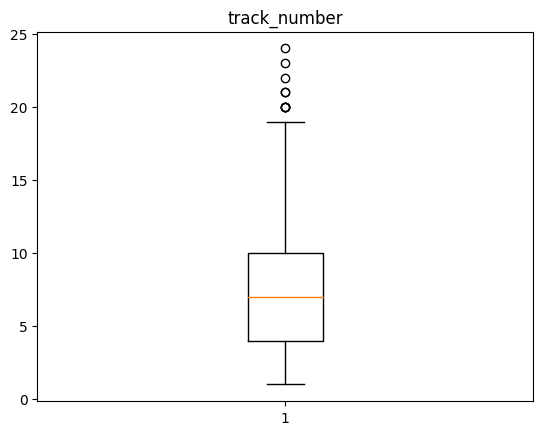

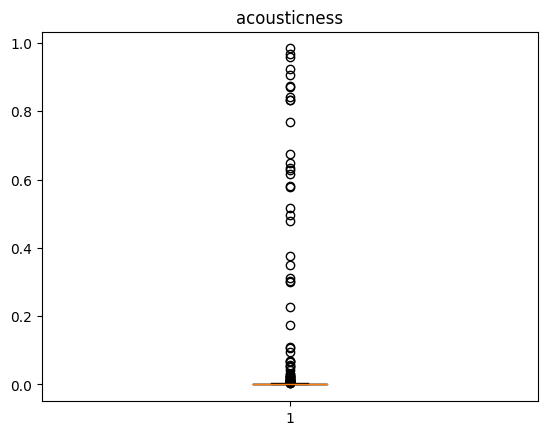

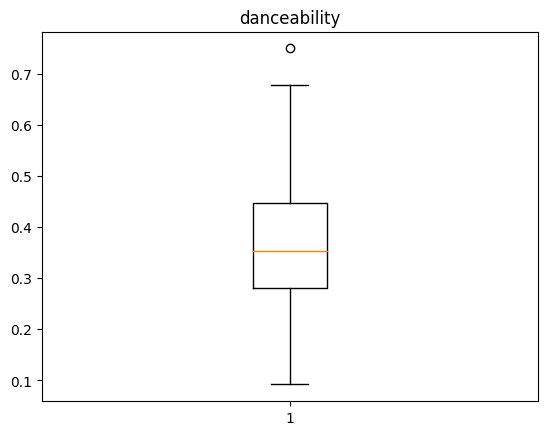

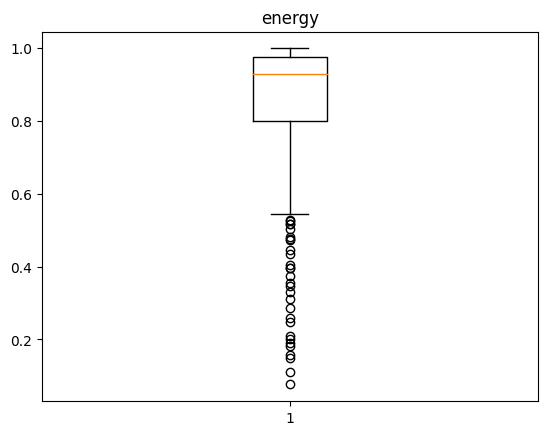

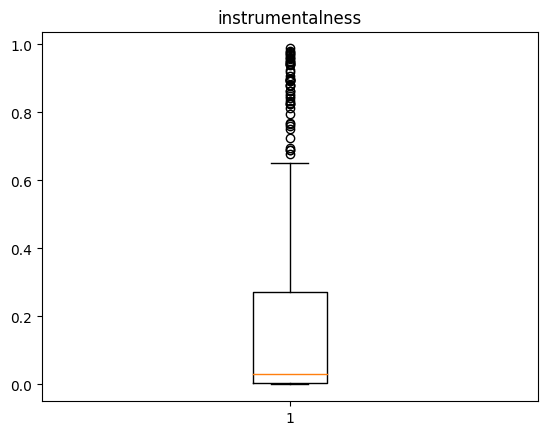

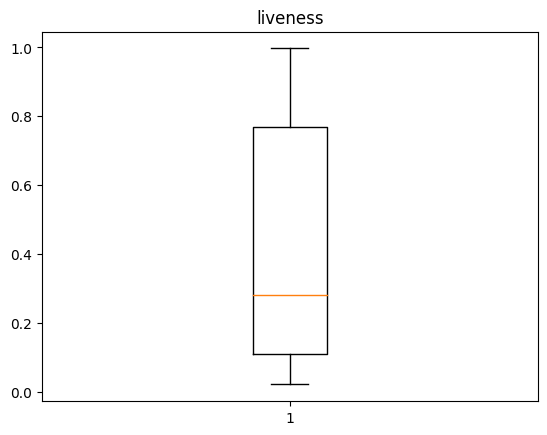

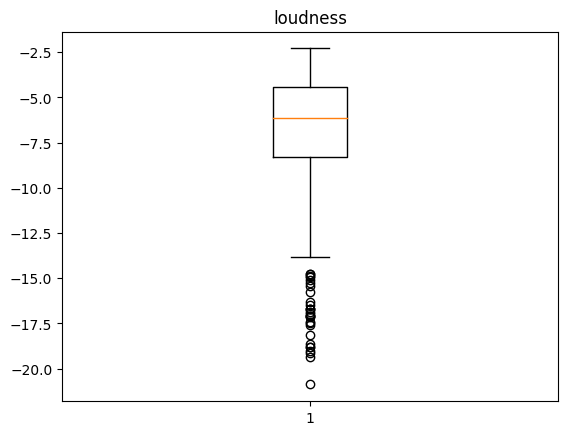

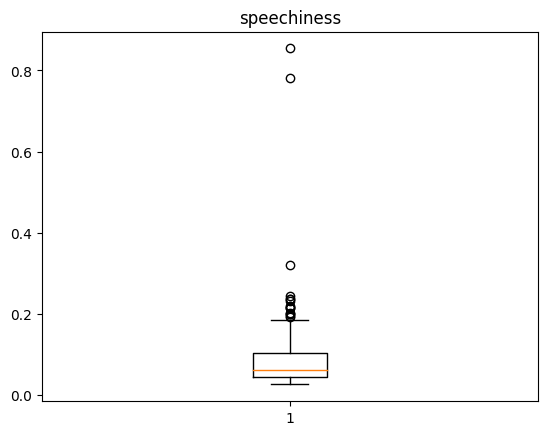

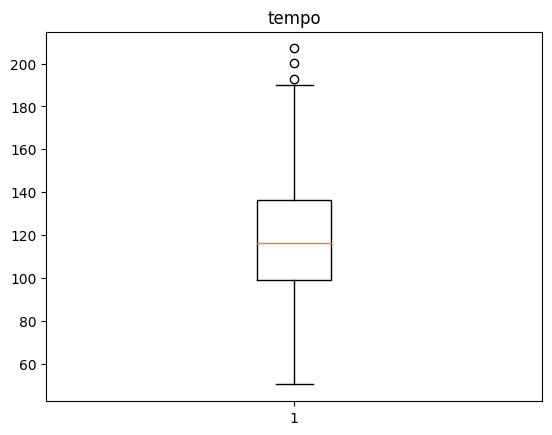

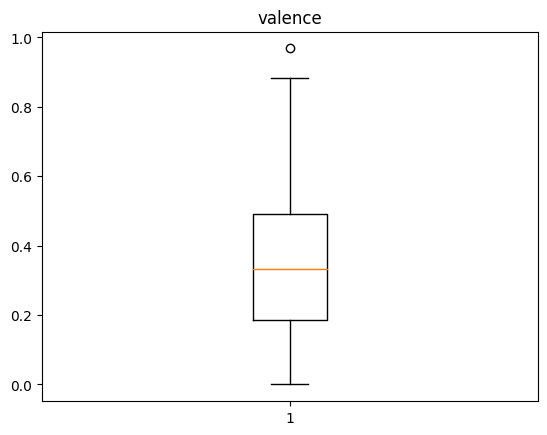

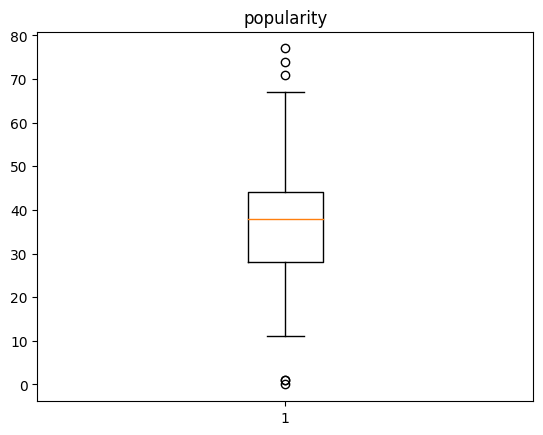

In [30]:
# otra manera de ver si los datos son coherentes, es graficar los rangos
# para ver si tenemos outlayers

import matplotlib.pyplot as plt

cols_num = ['track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity']

for col in cols_num:
    plt.figure()  # Create a new figure for each plot
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Errores tipograficos en variables categóricas

<ipython-input-32-f12c7ac0b412>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x


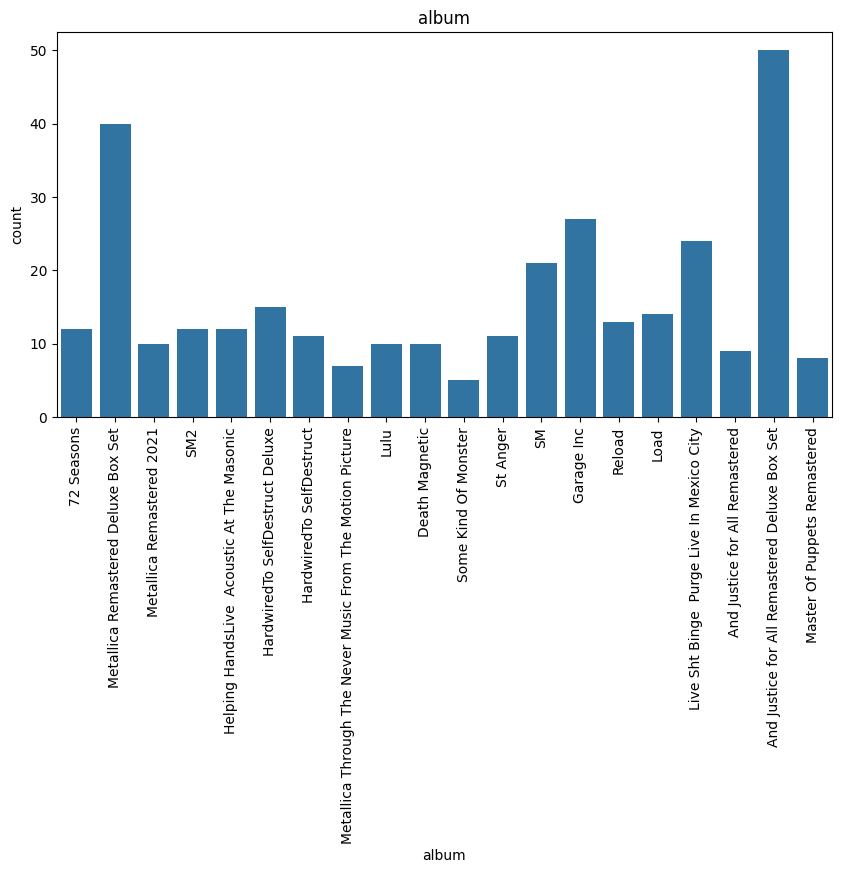

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas a visualizar
cols_cat = ['album']

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.subplots_adjust(wspace=1)  # Ajustar espaciado entre subplots

# Iterar sobre las columnas categóricas y crear un countplot para cada una
for col in cols_cat:
    sns.countplot(x=col, data=df, ax=axes)  # Usar axes directamente
    axes.set_title(col)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x

plt.show()  # Mostrar el gráfico

In [31]:
duplicados = df.duplicated(subset=['album'], keep=False)
registros_duplicados = df[duplicados]

if registros_duplicados.empty:
    print("No hay registros duplicados en la columna 'album'.")
else:
    print("Registros duplicados encontrados en la columna 'album':")
    #print(registros_duplicados)
registros_duplicados.head()

Registros duplicados encontrados en la columna 'album':


,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,72 Seasons,1,3uSATa7xWXVJrMhJJSnGGk,72 Seasons,spotifytrack3uSATa7xWXVJrMhJJSnGGk,0.000040,0.193,0.983,0.0375,0.0645,-3.929,0.0591,168.193,0.385,57
1,72 Seasons,2,5iG1GycXpheJ5xMW0gNvKv,Shadows Follow,spotifytrack5iG1GycXpheJ5xMW0gNvKv,0.000121,0.313,0.979,0.0313,0.2610,-3.907,0.0462,178.884,0.678,55
2,72 Seasons,3,2hBn08QphNtdnhwDNtnZMg,Screaming Suicide,spotifytrack2hBn08QphNtdnhwDNtnZMg,0.000024,0.425,0.972,0.0202,0.2390,-3.448,0.0450,101.125,0.282,57
3,72 Seasons,4,6HeYgpgqEo8SGis4dHwRbu,Sleepwalk My Life Away,spotifytrack6HeYgpgqEo8SGis4dHwRbu,0.000017,0.430,0.950,0.0641,0.1030,-4.203,0.0340,124.931,0.543,51
4,72 Seasons,5,1ALXFmNr7lrTug2LAE989q,You Must Burn,spotifytrack1ALXFmNr7lrTug2LAE989q,0.000122,0.397,0.958,0.0203,0.0378,-3.088,0.0341,85.836,0.416,51


In [33]:
streams_en_plataformas = df[['album', 'name','danceability', 'valence', 'energy', 'popularity']]
#streams_en_plataformas.sort_values(by = 'streams', ascending = False).head(15)
streams_en_plataformas

,album,name,danceability,valence,energy,popularity
0,72 Seasons,72 Seasons,0.193,0.385,0.983,57
1,72 Seasons,Shadows Follow,0.313,0.678,0.979,55
2,72 Seasons,Screaming Suicide,0.425,0.282,0.972,57
3,72 Seasons,Sleepwalk My Life Away,0.430,0.543,0.950,51
4,72 Seasons,You Must Burn,0.397,0.416,0.958,51
...,...,...,...,...,...,...
362,Master Of Puppets Remastered,Welcome Home Sanitarium,0.306,0.420,0.766,54
363,Master Of Puppets Remastered,Disposable Heroes,0.292,0.427,0.931,54
364,Master Of Puppets Remastered,Leper Messiah,0.379,0.557,0.808,53
365,Master Of Puppets Remastered,Orion,0.365,0.400,0.670,54


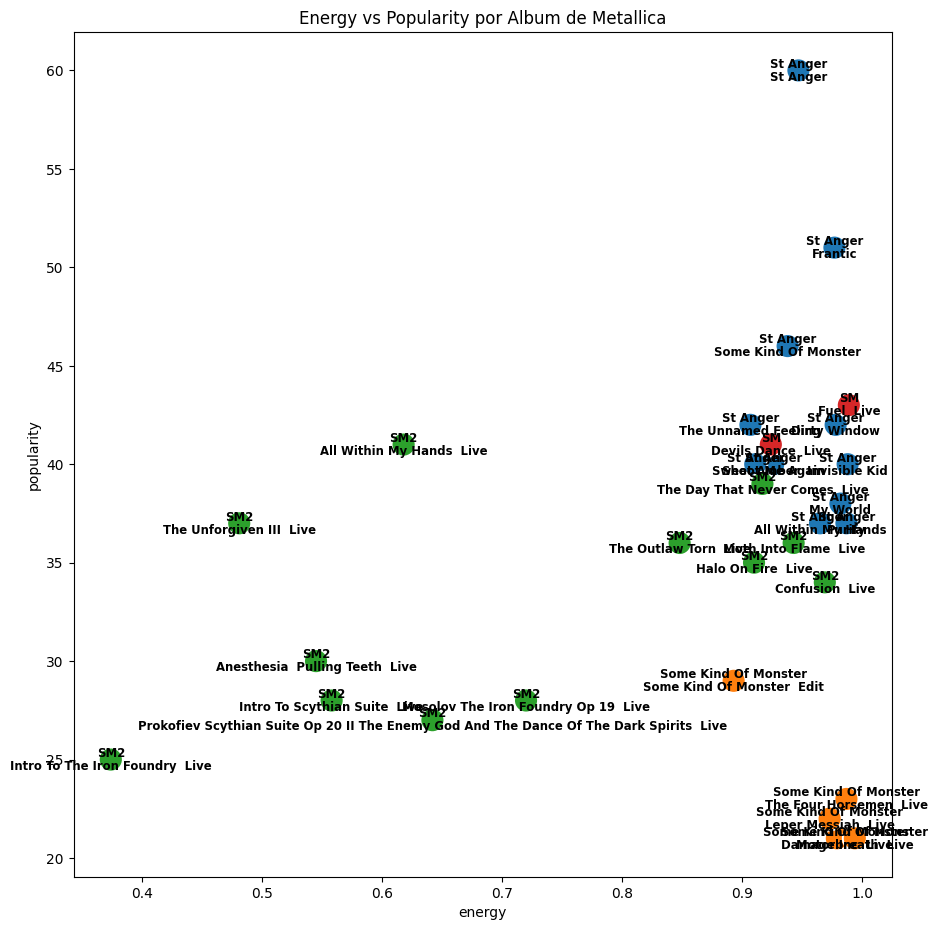

In [34]:
# Seleccionar las columnas relevantes y ordenar por streams de mayor a menor
streams_en_plataformas = df[['album', 'name','danceability', 'valence', 'energy', 'popularity']]
streams_ordenados = streams_en_plataformas.sort_values(by='album', ascending=False).head(30)

# Crear el gráfico combinado
plt.figure(figsize=(18, 18))

# Scatter plot de danceability vs valence con el nombre de la canción como hue
plt.subplot(2, 2, 1)
sns.scatterplot(x='energy', y='popularity', hue='album', data=streams_ordenados, s=300)

# Mostrar el nombre de la canción encima de cada punto y el nombre del artista debajo de cada punto
for line in range(0,streams_ordenados.shape[0]):
     plt.text(streams_ordenados['energy'].iloc[line], streams_ordenados['popularity'].iloc[line],
              streams_ordenados['album'].iloc[line], horizontalalignment='center',
              verticalalignment='bottom', size='small', color='black', weight='semibold')
     plt.text(streams_ordenados['energy'].iloc[line], streams_ordenados['popularity'].iloc[line],
              streams_ordenados['name'].iloc[line], horizontalalignment='center',
              verticalalignment='top', size='small', color='black', weight='semibold')

plt.title('Energy vs Popularity por Album de Metallica')
plt.legend().set_visible(False)  # Ocultar la leyenda

plt.tight_layout()
plt.show()

In [35]:
import plotly.express as px
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Crear el gráfico de correlación
fig = px.imshow(df_numerico.corr(), text_auto=True, height=800, width=800,
                color_continuous_scale=px.colors.sequential.Greens, aspect='auto',
                title='<b>Correlación por pares de las columnas</b>')

# Actualizar el layout del gráfico
fig.update_layout(title_x=0.5)

# Mostrar el gráfico
fig.show()

Esto es genial y entretenido. Esta representación nos muestra en cada rectángulo a un album de Metallica, ordenados de mas popular a menos popular, y eso se ve por el tamaño del mismo. Al interior de cada album, pasa lo mismo con cada tema.

In [36]:
fig=px.treemap(df,path=[px.Constant('Nombre del Album'),'album','name'],values='popularity',title='<b>Mapa de árbol de la popularidad de los albumes de la banda')
fig.update_traces(root_color='lightgreen')
fig.update_layout(title_x=0.5)

In [36]:
df[['album','name']]

,album,name
0,72 Seasons,72 Seasons
1,72 Seasons,Shadows Follow
2,72 Seasons,Screaming Suicide
3,72 Seasons,Sleepwalk My Life Away
4,72 Seasons,You Must Burn
...,...,...
362,Master of Puppets Remastered,Welcome Home Sanitarium Remastered
363,Master of Puppets Remastered,Disposable Heroes Remastered
364,Master of Puppets Remastered,Leper Messiah Remastered
365,Master of Puppets Remastered,Orion Remastered


Este se una representación los temas de la bandan, respecto de dos variables, la energía y la popularidad. Todos los temas en general son muy energéticos, pero no todos igualmente populares.

In [38]:
px.scatter(df,x='energy',y='popularity',color='energy',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Energy Versus Popularity')

Esto nos muestra la popularidad versus energía de los temas del album St Anger

para el quie quiera ver el video:

https://www.youtube.com/watch?v=6ajl1ABdD8A



In [37]:
import plotly.express as px

# filtras los datos para el album deseado
album_deseado = "St Anger"  # reemplazar con el nombre del album
album_name = album_deseado.replace(" ", "_")  # reemplaza los espacios por guiones bajos

#filtrando el df
df_filtrado = df[df['album'] == album_deseado]  # filtra el df para el album deseado

# Crea una nueva df
df_nuevo = df_filtrado[['energy', 'popularity', 'name']]  # extrae las columnas relevantes

# Gerneramos el gráfico entre energía y popularidad
px.scatter(df_nuevo, x='energy', y='popularity', color='energy',
          color_continuous_scale=px.colors.sequential.Plasma,
          template='plotly_dark', title='Energía vs Popularidad - ' + album_deseado,
          text='name', hover_name='name', hover_data=['name', 'energy', 'popularity'])

#popularity:

# Significado: Una medida de popularidad de la pista.Escala: 0 a 100 (valores más altos indican mayor popularidad).
# Rangos razonables: La mayoría de las pistas populares tienen valores superiores a 50.
# Los Outliers: Valores cercanos a 0 pueden considerarse outliers.

# energy
# Significado: Medida perceptual de intensidad y actividad. Las pistas energéticas se sienten rápidas, fuertes y ruidosas.
# Escala: 0.0 a 1.0 (valor más alto indica mayor energía).
# Rangos razonables: Valores superiores a 0.5 indican alta energía.
# Outliers: Valores cercanos a 0 o a 1 pueden considerarse outliers.


